# <font color = 'red'> **import libraries**

In [1]:
# regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)

# <font color = 'red'> **import dataset**

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of the dataframe
df.shape

(730, 16)

## <font color = 'red'> Dataset information

In [5]:
# checking basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check if any column has null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## <font color = 'red'> column names renaming

In [8]:
# renaming the columns for clear understanding in graphs
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'temp':'temperature', 'atemp': 'feeling_temp', 'cnt':'count'}, inplace=True)

## <font color = 'red'> removal of unwanted columns

In [9]:
# dropping the unnecessary columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

## <font color = 'red'> renaming vlaues in categorical columns

In [10]:
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [11]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist_cloudy',3:'Light_snowrain',4:'Heavy_snowrain'})
df.year = df.year.map({0:'2018',1:'2019'})
df.holiday = df.holiday.map({0:'No',1:'Yes'})
df.workingday = df.workingday.map({0:'No',1:'Yes'})

In [12]:
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temp,humidity,windspeed,count
0,spring,2018,jan,No,sat,No,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,sun,No,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801


# <font color = 'red'> **Data visualization**

### <font color = 'orange'> categorical variables VS target variables

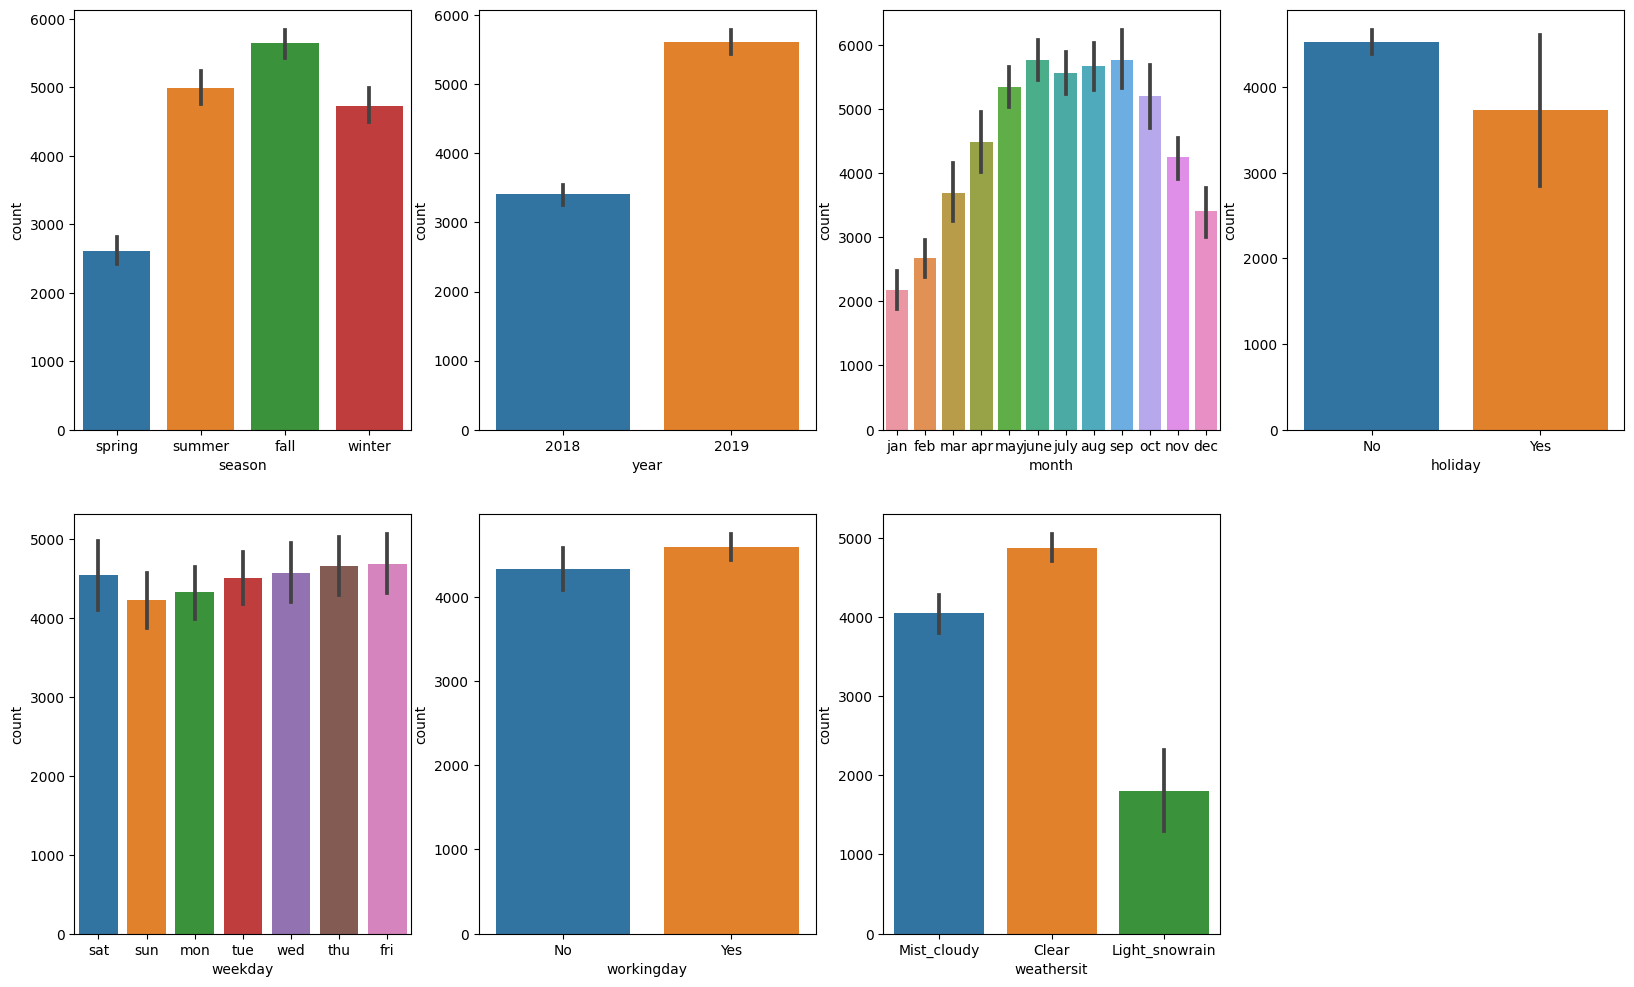

In [13]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'count', data = df)

plt.subplot(2,4,2)
sns.barplot(x = 'year', y = 'count', data = df)

plt.subplot(2,4,3)
sns.barplot(x = 'month', y = 'count', data = df)

plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'count', data = df)

plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'count', data = df)

plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'count', data = df)

plt.subplot(2,4,7)
sns.barplot(x = 'weathersit', y = 'count', data = df)

plt.show()


* among seasons during the spring there is significant drop in demand of bikes
* 2019 saw more demand of bikes than 2018
* in a year's time the demand increased gradually from january to june and then it decreased till december
* demand was low during the holidays
* demand is high on clear day but low on snow and rainy day

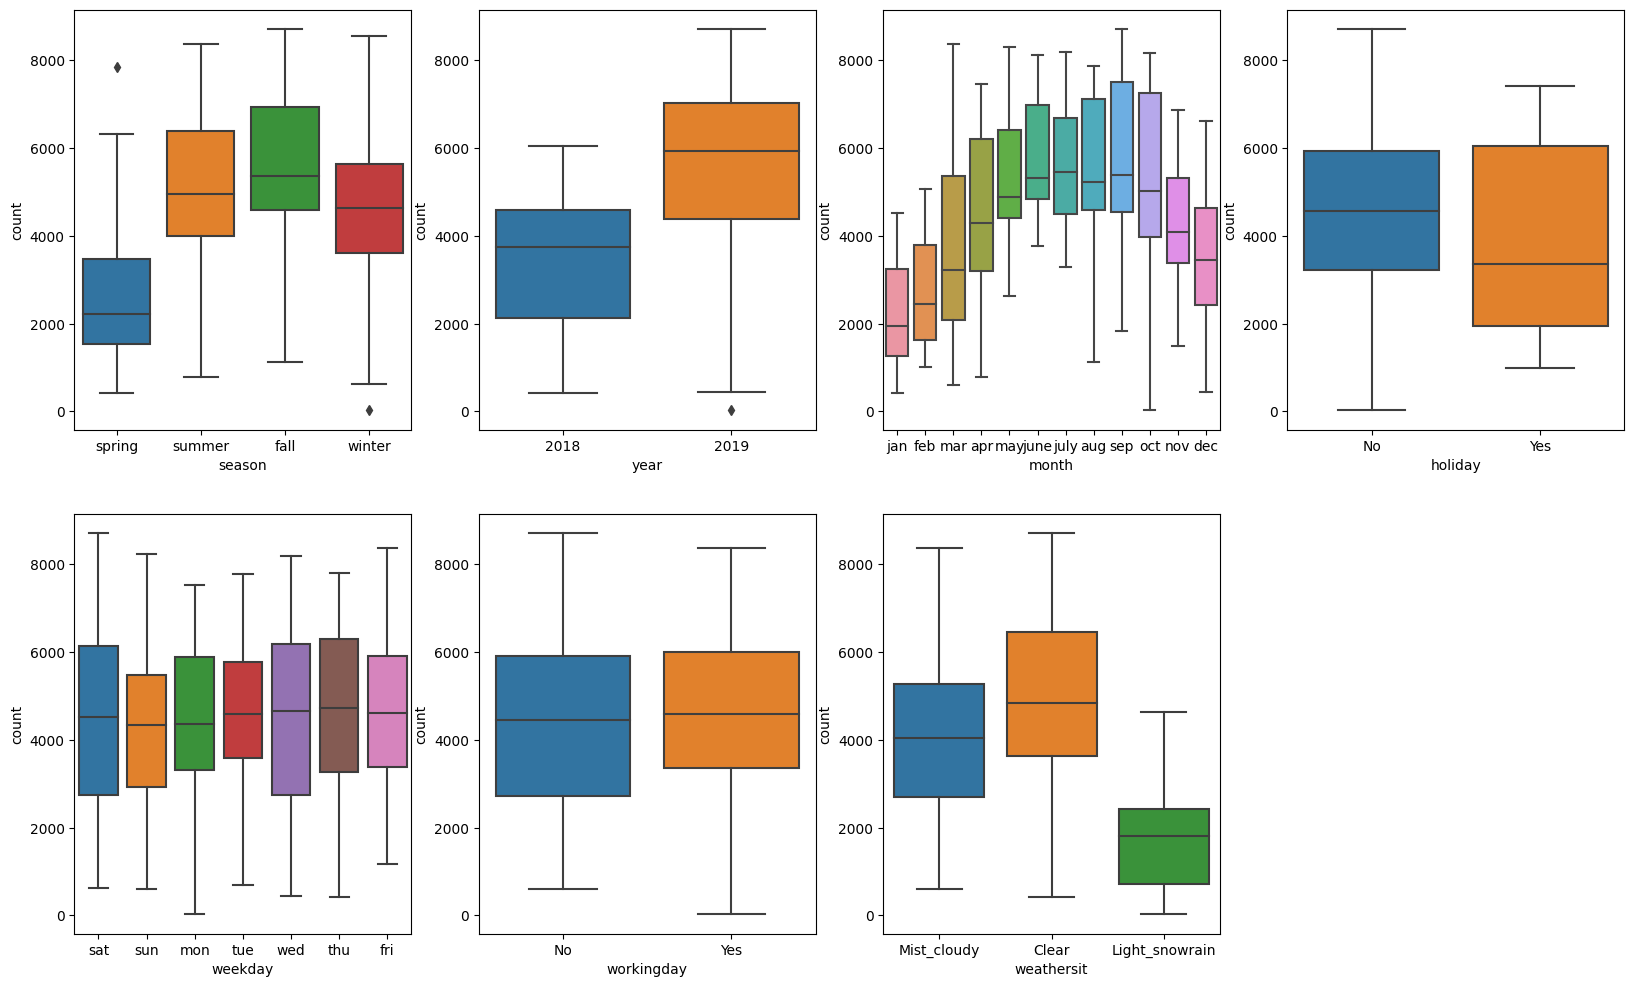

In [14]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = df)

plt.show()


### <font color = 'orange'> numerical variables VS target variables

In [15]:
df.head(1)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temp,humidity,windspeed,count
0,spring,2018,jan,No,sat,No,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985


<Figure size 1500x1000 with 0 Axes>

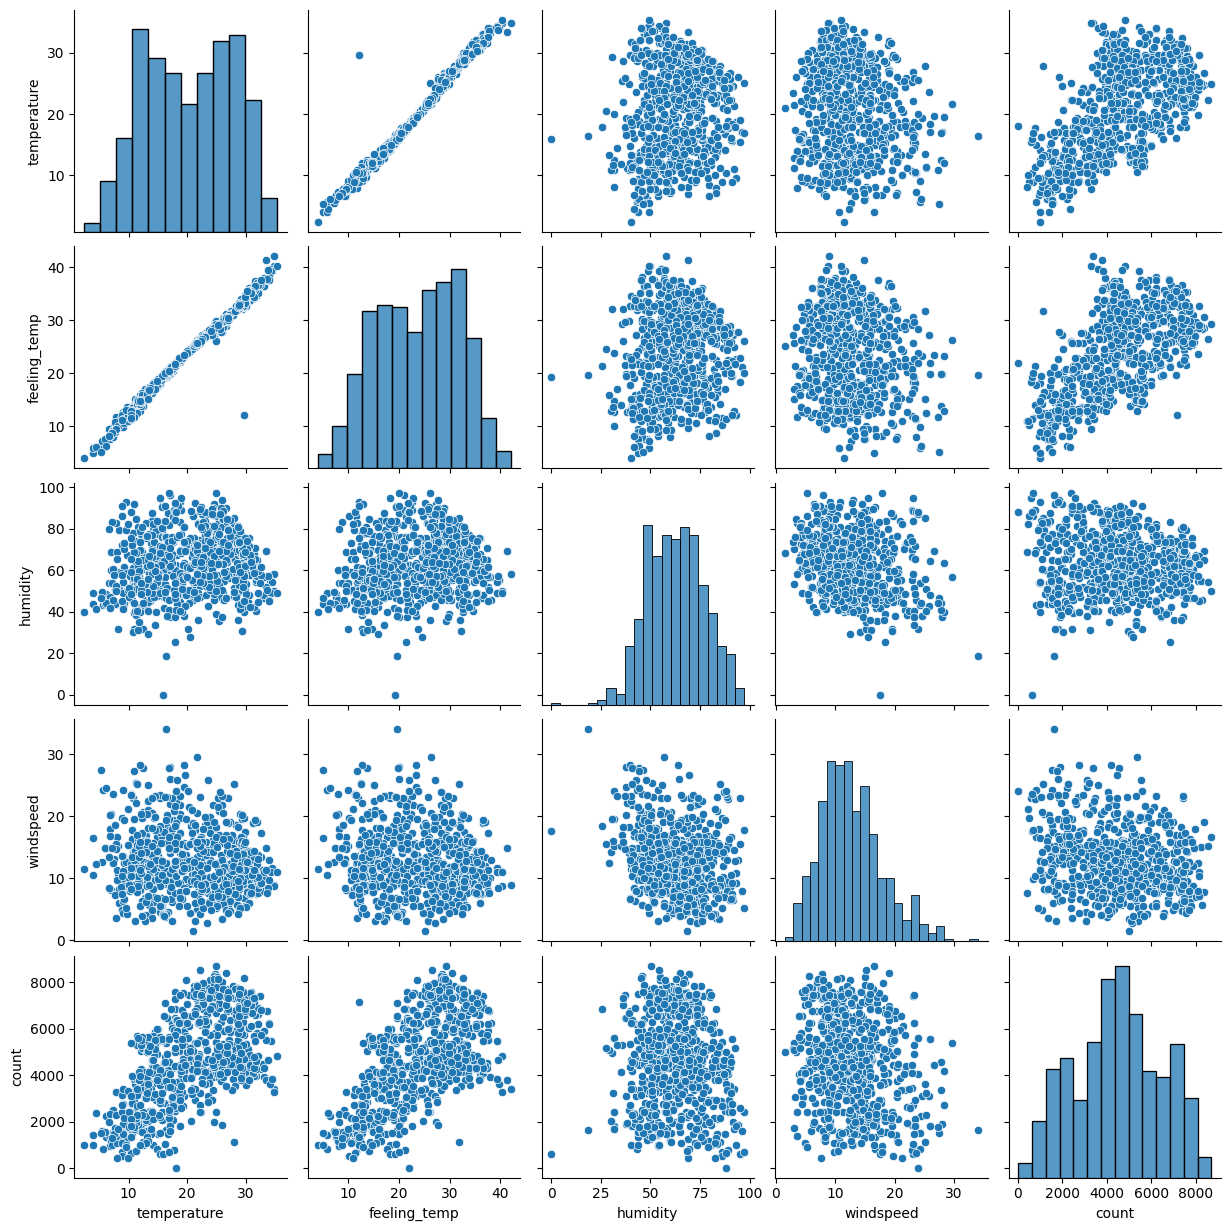

In [16]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,vars=['temperature','feeling_temp','humidity','windspeed','count'])
plt.show()


* there is huge correlation between temperature and feeling_temp columns
* one of these can be removed

In [17]:
# dropping the 'feeling_temp' column
df.drop('feeling_temp',axis=1,inplace=True)

In [18]:
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,spring,2018,jan,No,sat,No,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,No,sun,No,Mist_cloudy,14.902598,69.6087,16.652113,801


## <font color = 'red'> data preparation for modeling

* categorical columns with just 2 variables can be converted back to just 0 and 1

In [19]:
df.year = df.year.map({'2018':0,'2019':1})
df.holiday = df.holiday.map({'No':0,'Yes':1})
df.workingday = df.workingday.map({'No':0,'Yes':1})

In [21]:
# dummy variable creation
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [22]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [23]:
df_new.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
0,spring,0,jan,0,sat,0,Mist_cloudy,14.110847,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Mist_cloudy,14.902598,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False


In [24]:
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [25]:
df_new.shape

(730, 29)

In [26]:
df_new.head(2)

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False


# <font color = 'red'> **Model Building**

* splitting the data into train and test in 70:30 ratio

In [27]:
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 12)

In [28]:
df_train.shape, df_test.shape

((510, 29), (220, 29))

In [29]:
# scaling
scaler = MinMaxScaler()

In [30]:
df_train.head(2)

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
366,1,1,0,11.194763,38.1304,22.087555,1951,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
332,0,0,1,18.791653,83.0833,17.292164,2914,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True


In [31]:
# scaling the numerical variables
num_vars = ['temperature', 'humidity', 'windspeed', 'count']

In [32]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head(2)

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
366,1,1,0,0.270763,0.246484,0.633460,0.183508,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
332,0,0,1,0.505296,0.819437,0.485909,0.299771,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True


In [34]:
# splitting the training data into X and y
y_train = df_train.pop('count')
X_train = df_train

In [35]:
# creation of regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# creation of RFE object
rfe = RFE(estimator= lm, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 8),
 ('mar', False, 9),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', False, 2),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 11),
 ('wed', False, 6),
 ('Light_snowrain', True, 1),
 ('Mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'dec', 'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Mist_cloudy',
       'spring', 'winter'],
      dtype='object')


* creation of VIF dataframe

In [38]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [39]:
X_train.dtypes

year                int64
holiday             int64
workingday          int64
temperature       float64
humidity          float64
windspeed         float64
aug                  bool
dec                  bool
feb                  bool
jan                  bool
july                 bool
june                 bool
mar                  bool
may                  bool
nov                  bool
oct                  bool
sep                  bool
mon                  bool
sat                  bool
sun                  bool
thu                  bool
tue                  bool
wed                  bool
Light_snowrain       bool
Mist_cloudy          bool
spring               bool
summer               bool
winter               bool
dtype: object

In [40]:
bool_columns = X_train.select_dtypes(include='bool').columns

In [41]:
bool_columns

Index(['aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Mist_cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [42]:
len(bool_columns)

22

In [43]:
X_train[bool_columns] = X_train[bool_columns].astype(int)

In [44]:
X_train_rfe = X_train[col]

In [45]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,37.93
9,sat,8.53
10,sun,8.52
3,temperature,3.49
1,holiday,3.06
13,spring,2.78
14,winter,2.12
4,humidity,2.08
12,Mist_cloudy,1.68
8,nov,1.63


* column 'working day' has VIF greater than 10

# <font color = 'red'> **Model Building**

In [46]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.86e-189
Time:                        21:56:48   Log-Likelihood:                 498.46
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     495   BIC:                            -903.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2319      0.025      9.

In [47]:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

In [49]:
calculateVIF(X_train_new)

,Features,VIF
3,humidity,17.85
2,temperature,14.54
4,windspeed,4.99
13,winter,2.52
11,Mist_cloudy,2.44
12,spring,2.41
0,year,2.00
7,nov,1.69
6,july,1.43
5,dec,1.35


In [50]:

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.86e-189
Time:                        21:57:40   Log-Likelihood:                 498.46
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     495   BIC:                            -903.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3151      0.031     10.

* removal of column 'humidity' as it has highest VIF greater than 10

In [51]:
X_train_new = X_train_new.drop(['humidity'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temperature,4.99
3,windspeed,4.97
12,winter,2.24
0,year,1.99
11,spring,1.87
6,nov,1.66
10,Mist_cloudy,1.53
5,july,1.35
4,dec,1.32
7,sat,1.21


In [52]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.70e-187
Time:                        21:58:05   Log-Likelihood:                 491.79
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     496   BIC:                            -896.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2612      0.027      9.

In [53]:
#  removal of sat column as it has high p value
X_train_new = X_train_new.drop(['sat'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temperature,4.96
3,windspeed,4.90
11,winter,2.24
0,year,1.98
10,spring,1.86
6,nov,1.66
9,Mist_cloudy,1.53
5,july,1.35
4,dec,1.32
7,sun,1.17


In [54]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.07e-188
Time:                        21:58:16   Log-Likelihood:                 490.75
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     497   BIC:                            -900.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2658      0.027      9.

In [55]:
# lr_4 model can be considered as all columns have VIF less than 5 and p value is less than 0.05

In [56]:
lr_4.params

const             0.265771
year              0.249982
holiday          -0.083682
temperature       0.408618
windspeed        -0.121250
dec              -0.068397
july             -0.059361
nov              -0.083394
sun              -0.043365
Light_snowrain   -0.236886
Mist_cloudy      -0.080595
spring           -0.153367
winter            0.075431
dtype: float64

# <font color = 'red'> **residual analysis**

In [57]:
X_train_lm_4.head()

,const,year,holiday,temperature,windspeed,dec,july,nov,sun,Light_snowrain,Mist_cloudy,spring,winter
366,1.0,1,1,0.270763,0.633460,0,0,0,0,0,0,1,0
332,1.0,0,0,0.505296,0.485909,0,0,1,0,0,1,0,1
514,1.0,1,0,0.756340,0.230765,0,0,0,0,0,1,0,0
718,1.0,1,0,0.342857,0.226918,1,0,0,0,0,1,0,1
164,1.0,0,0,0.689888,0.508979,0,0,0,0,0,0,0,0


In [58]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

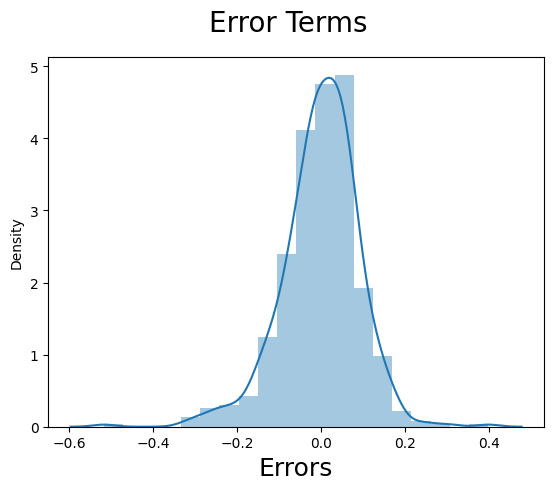

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

* the errors are normally distributed with mean at 0

In [60]:
calculateVIF(X_train_new)

,Features,VIF
2,temperature,4.96
3,windspeed,4.90
11,winter,2.24
0,year,1.98
10,spring,1.86
6,nov,1.66
9,Mist_cloudy,1.53
5,july,1.35
4,dec,1.32
7,sun,1.17


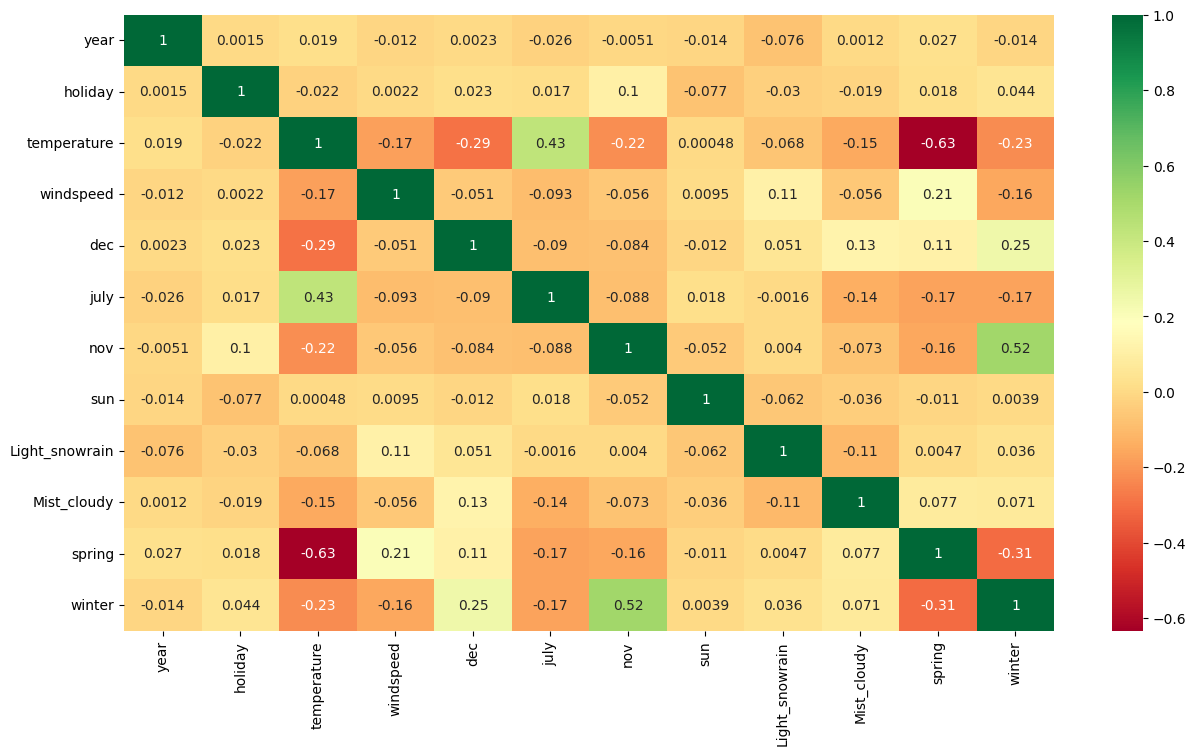

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()


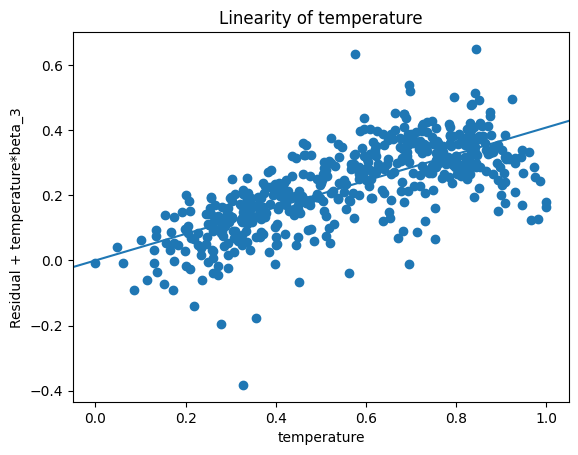

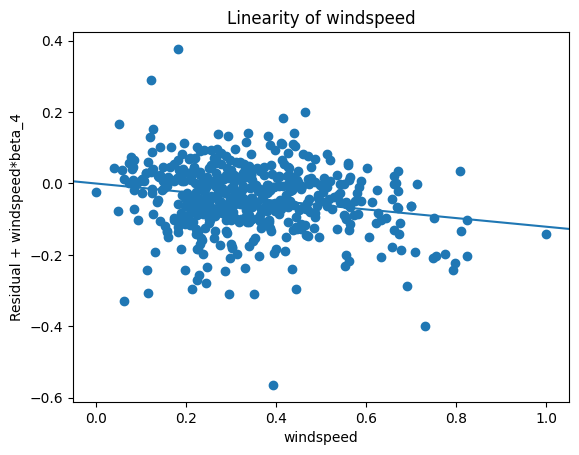

In [63]:
# checking the linearity in the graph

sm.graphics.plot_ccpr(lr_4, 'temperature')
plt.title('Linearity of temperature')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.title('Linearity of windspeed')
plt.show()

# <font color = 'red'> **making predictions of test set using the final model**

In [64]:
num_vars

['temperature', 'humidity', 'windspeed', 'count']

In [65]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
509,1,0,1,0.785874,0.712692,0.243590,0.760956,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
301,0,0,0,0.246870,0.885289,0.678208,0.023663,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
56,0,0,0,0.282733,0.446097,0.338464,0.185682,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
560,1,0,0,0.869204,0.675518,0.297431,0.676084,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
543,1,0,1,0.873424,0.298991,0.307704,0.778462,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [66]:
bool_columns = df_test.select_dtypes(include='bool').columns

In [67]:
df_test[bool_columns] = df_test[bool_columns].astype(int)

In [68]:
df_test.head(2)

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Mist_cloudy,spring,summer,winter
509,1,0,1,0.785874,0.712692,0.243590,0.760956,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
301,0,0,0,0.246870,0.885289,0.678208,0.023663,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


In [69]:
y_test = df_test.pop('count')
X_test = df_test

In [70]:
col1 = X_train_new.columns
X_test = X_test[col1]

In [71]:
# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [72]:
y_pred = lr_4.predict(X_test_lm_4)

In [73]:
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.815

In [74]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.804


# <font color = 'red'> **Model evaluation**

Text(0, 0.5, 'y_pred')

<Figure size 800x400 with 0 Axes>

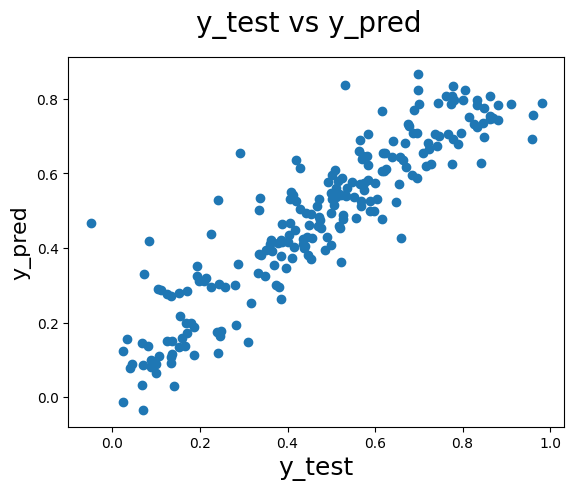

In [75]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(8,4))
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

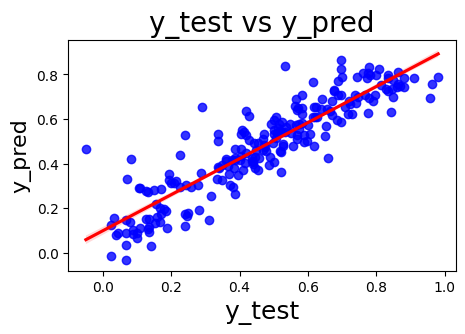

In [76]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# <font color = 'red'> Performance of model:
* **Trainset r^2** = <font color = 'blue'> **0.839**   
* **Testset r^2** = <font color = 'blue'> **0.815**
* **Trainset Adjusted r^2** = <font color = 'blue'> **0.835**
* **Testset Adjusted r^2** = <font color = 'blue'> **0.804**